In [12]:
import json
import os
import sys
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%load_ext autoreload

%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import end_to_end_profiles as e2e
import profiler
import single_model_profiles as sm_profs

In [29]:
pipeline_three_df = profiler.load_pipeline_three_systemx()

No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 35.057500000000005
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 27.67075517075517
No profile found for res152: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 15.964786324786324
No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 35.057500000000005
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 27.67075517075517
No profile found for res152: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 15.964786324786324
No profile found for alexnet: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 35.057500000000005
No profile found for res50: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 27.67075517075517
No profile found for res152: 1 gpus, 1 cpus, batch size 30. Approximating with batch size 15.964786324786324
No profile found for a

In [ ]:
pipeline_one_df = profiler.load_pipeline_one_systemx()

In [30]:
def plot_pipeline_exp(pipeline):
    plt.clf()
    fig, (ax_thru, ax_lat) = plt.subplots(ncols=2, nrows=1)
    fig.set_size_inches(12,8)
    colors = sns.color_palette(n_colors=8)
    i = 0
    for title, group in pipeline.groupby("name"):
        box = ax_lat.boxplot(x=group["latency"], labels=group["cost"], patch_artist=True)
        for patch in box["boxes"]:
            patch.set_facecolor(colors[i])
        lat = group["estimated_latency"].iloc[0]
        cost_xs = np.arange(0.0, max(pipeline["cost"]) + 0.8, 0.1)
        lat_ys = lat * np.ones(len(cost_xs))
        ax_lat.plot(cost_xs, lat_ys, '--', linewidth=2, color=colors[i])
        ax_thru.scatter(x=group["cost"], y=group["mean_throughput"], c=colors[i], marker="o", label=title)
        ax_thru.scatter(x=group["cost"], y=group["estimated_thru"], c=colors[i], marker="^", label="")

        i += 1
    ax_lat.set_ylabel("Latency (s)")
    ax_lat.set_xlim((0,max(pipeline["cost"]) + 0.8))
    ax_thru.set_xlim((0,max(pipeline["cost"]) + 0.8))

    ax_lat.set_xlabel("Cost ($/hr)")
    ax_thru.set_ylabel("Throughput (queries/s)")
    ax_thru.set_xlabel("Cost ($/hr)")
    ax_thru.legend(loc=2)


    plt.show()

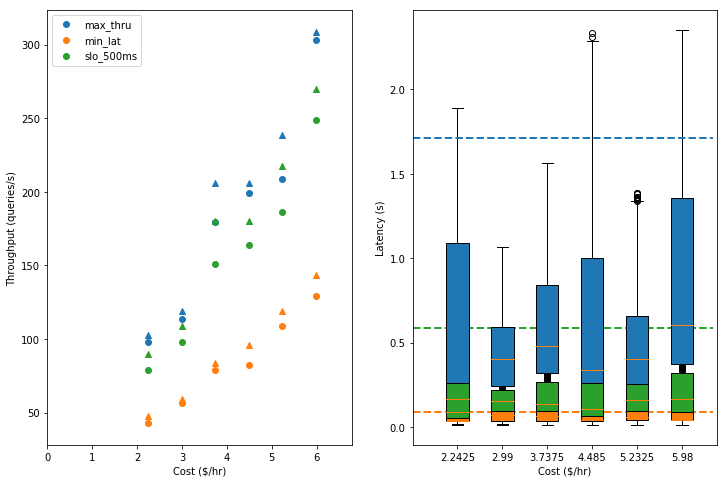

In [31]:
plot_pipeline_exp(pipeline_three_df)

In [ ]:
pipeline_one_df

In [32]:
pipeline_three_df

,name,mean_throughput,estimated_thru,p99_latency,p95_latency,estimated_latency,cost,latency
0,max_thru,97.768728,102.872158,1.701321,1.488131,1.709985,2.2425,"[1.018285, 0.721968, 0.926071, 0.84452, 0.8139..."
1,max_thru,113.694371,119.220143,0.915799,0.818349,1.709985,2.9900,"[0.622251, 0.525845, 0.693161, 0.701989, 0.613..."
2,max_thru,179.265030,205.744316,1.284528,1.143185,1.709985,3.7375,"[0.246114, 0.23537, 0.157773, 0.491017, 0.5473..."
3,max_thru,198.976145,205.744316,1.983239,1.666201,1.709985,4.4850,"[1.704993, 1.725201, 1.483675, 1.612796, 1.592..."
4,max_thru,208.562891,238.440285,1.176260,1.008316,1.709985,5.2325,"[0.347621, 0.367169, 0.328863, 0.42506, 0.3868..."
5,max_thru,303.203825,308.616474,1.997320,1.782837,1.709985,5.9800,"[0.528573, 0.59685, 1.420439, 1.460059, 1.5127..."
0,min_lat,43.142385,47.836820,0.553647,0.343892,0.090638,2.2425,"[0.01593, 0.152008, 0.039349, 0.131485, 0.0399..."
1,min_lat,56.604757,59.505453,0.211026,0.152273,0.090638,2.9900,"[0.048815, 0.051563, 0.108017, 0.105071, 0.015..."
2,min_lat,78.752082,83.878489,0.260658,0.196191,0.090638,3.7375,"[0.126065, 0.129236, 0.043377, 0.112062, 0.116..."
3,min_lat,82.023126,95.673640,0.325445,0.218063,0.090638,4.4850,"[0.0153, 0.040776, 0.128598, 0.125517, 0.04164..."


In [33]:
single_model_profs = sm_profs.load_single_model_profiles()

In [34]:

single_model_profs["alexnet"]

,num_gpus_per_replica,num_cpus_per_replica,mean_throughput_qps,std_throughput_qps,p99_latency_ms,mean_batch_size,inst_type,cost
0,1,1,83.878489,0.038358,0.015101,1.000000,p2.8xlarge,0.7475
1,1,1,116.748684,0.239319,0.030743,1.762531,p2.8xlarge,0.7475
2,1,1,147.635760,0.375504,0.049795,3.345835,p2.8xlarge,0.7475
3,1,1,162.259959,0.631628,0.065084,5.042519,p2.8xlarge,0.7475
4,1,1,175.500178,0.873927,0.077975,6.614454,p2.8xlarge,0.7475
5,1,1,174.538539,0.880917,0.077491,6.451842,p2.8xlarge,0.7475
6,1,1,181.054837,0.997950,0.085482,7.198521,p2.8xlarge,0.7475
7,1,1,185.824708,2.145355,0.127311,11.414000,p2.8xlarge,0.7475
8,1,1,186.851308,1.559642,0.127728,11.452920,p2.8xlarge,0.7475
9,1,1,200.897287,2.794113,0.251107,24.822222,p2.8xlarge,0.7475


In [ ]:
pipeline_three_df

In [ ]:
pipeline_three_df["cost"].iloc[0]

In [ ]:
max(pipeline_three_df["cost"])

In [ ]:
np.linspace(0.0, 5.4, 50)